In [1]:
import functools
import matplotlib.pyplot as plt 
import nibabel as nib
import numpy as np
import tensorflow as tf
import random
import datetime

In [2]:
import os

from google.colab import drive

DATA_DIR = 'ml4h_proj1_colon_cancer_ct/'
LBL_TR_DIR = 'labelsTr'
IMG_TR_DIR = 'imagesTr'
IMG_TS_DIR = 'imagesTs'

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/ML4H/')

Mounted at /content/drive


Overlaying all the masks shows us that we could only focus on the center of the image.

In [3]:
def training_files():
  return zip(
      map(lambda f: os.path.join(DATA_DIR, IMG_TR_DIR, f), os.listdir(os.path.join(DATA_DIR, LBL_TR_DIR))),
      map(lambda f: os.path.join(DATA_DIR, LBL_TR_DIR, f), os.listdir(os.path.join(DATA_DIR, LBL_TR_DIR)))
  )

In [4]:
all_masks = []
for img_path, lbl_path in training_files():
  mask_img = nib.load(lbl_path).get_fdata()
  for cut in range(0, mask_img.shape[2]):
    img_cut = mask_img[:,:,cut]
    if (img_cut == 0).all():
      continue
    all_masks.append(img_cut)

plt.imshow(functools.reduce(lambda a, b: a + b == 1, all_masks))
plt.show()
plt.close()

KeyboardInterrupt: ignored

Some stats

In [ ]:
cut_count_total = 0
cut_count_w_cancer = 0

for img_path, lbl_path in training_files():
  mask_img = nib.load(lbl_path).get_fdata()
  for cut in range(0, mask_img.shape[2]):
    cut_count_total += 1
    img_cut = mask_img[:,:,cut]
    if (img_cut == 0).all():
      continue
    cut_count_w_cancer += 1

print(cut_count_total)
print(cut_count_w_cancer)

10162
1034


Thresholding

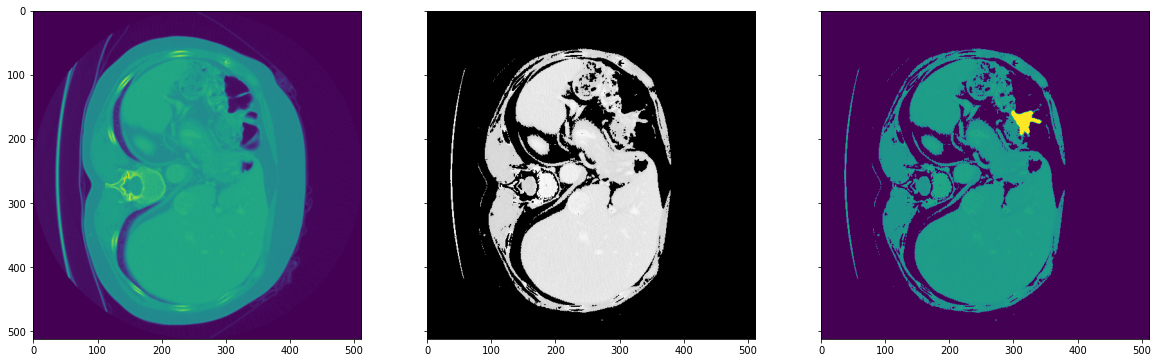

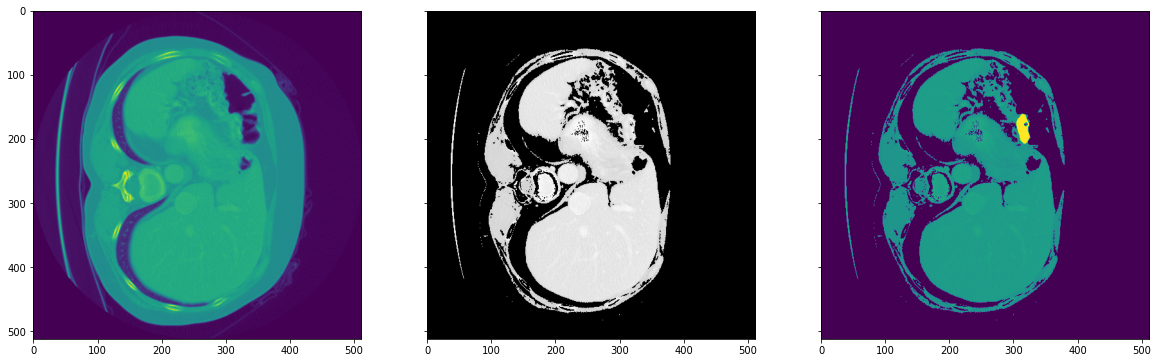

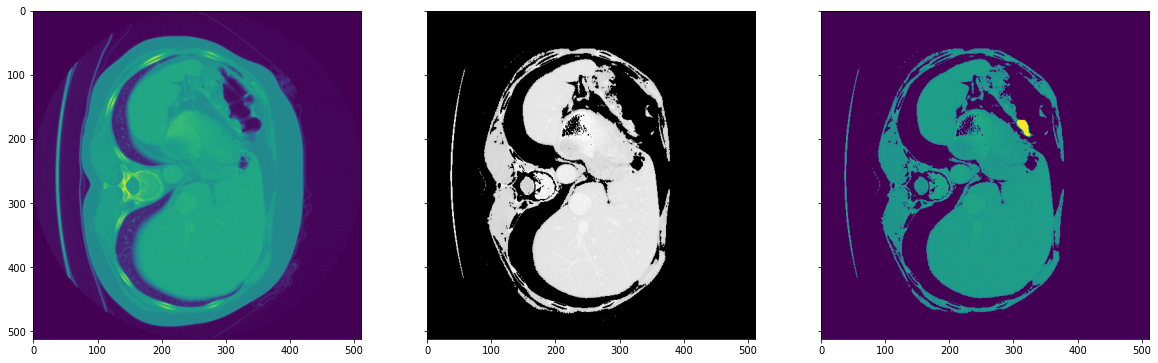

In [5]:
MIN_INT = 0
MAX_INT = 250

OUTPUT_SIZE = 3

def filter_img(img):
  img_copy = img.copy()
  for cut in range(0, img_copy.shape[2]):
    cut = img_copy[:,:,cut]
    cut[cut < MIN_INT] = -1000
    cut[cut > MAX_INT] = -1000
  return img_copy

for img_path, lbl_path in training_files():
  img = nib.load(img_path).get_fdata()
  nrm = filter_img(img)
  lbl = nib.load(lbl_path).get_fdata()
  for cut in range(0, img.shape[2]):
    # check if there is a significant amount of cancer
    if (lbl[:,:,cut] != 0).sum() < 100:
      continue
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
    f.set_size_inches(20,20)
    ax1.imshow(img[:,:,cut])
    ax2.imshow(nrm[:,:,cut], cmap="gray")
    ax3.imshow(np.where(lbl[:,:,cut], 1024, nrm[:,:,cut]))
    plt.show()
    plt.close()
    OUTPUT_SIZE -= 1
  if not OUTPUT_SIZE:
    break

In [ ]:
!pip install keras_unet